# Group Work Submission 3: VARMA and NN

Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from matplotlib import dates
from datetime import datetime
import scipy.stats as stats
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from statsmodels.tsa.statespace.varmax import VARMAX
from arch import arch_model
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn import neural_network
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

C:\Users\MyLenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Importing and Selection**

From the previous assignment, re-import the data from the csv file

In [2]:
df = pd.read_csv('MScFE 650 MLF GWP Data.csv', index_col=0) 
df

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-Sep-20,988.345,1450.64,2252.2500,1166.97,84.95,64.63,1424.53,2018.62,94.77,11122.05,...,2570.43,1162.66,554.53,1328.1400,1238.65,78.45,14099.14,1362.07,1641.51,3191.72
2-Oct-20,1037.211,1506.32,2265.7000,1128.45,84.89,66.00,1365.07,2031.76,97.19,11389.27,...,2587.30,1172.45,543.08,1344.0300,1276.25,79.97,14355.01,1368.78,1658.14,3243.91
9-Oct-20,1075.670,1617.45,2214.3200,1187.29,90.01,69.35,1447.85,2076.53,101.03,11779.71,...,2635.08,1212.32,553.32,1358.9700,1291.47,82.44,14602.91,1375.90,1687.56,3370.62


Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  Choose the same one that your group used in the previous assignment.

* We choose: MSCI USA. 

**Measuring Skewness**

Summarize the following metrics for each series

Calculate the skewness of each return series

In [3]:
skew = df.pct_change().dropna().skew()
skew

LUXXX                    -0.377199
MSCI ARGENTINA           -1.558165
BLP ORIENTE MEDIO        -0.383367
MSCI AUSTRALIA           -1.591912
MSCI AUSTRIA             -0.865684
MSCI BELGIUM             -1.695599
MSCI BRAZIL               0.142589
MSCI CANADA              -2.363478
MSCI CHINA               -0.402967
MSCI DENMARK             -1.373932
MSCI EM ASIA             -0.606767
MSCI EM EU-MIDE-AFRICA   -0.954112
MSCI EM EUROPE           -1.601282
MSCI EM LATIN AMERICA    -0.516197
MSCI FINLAND             -1.711737
MSCI FRANCE              -1.648456
MSCI GERMANY             -1.506593
MSCI HONG KONG           -0.274383
MSCI INDIA               -0.277847
MSCI ITALY               -1.755134
MSCI JAPAN               -0.454980
MSCI KOREA               -0.732136
MSCI MEXICO              -0.779074
MSCI NETHERLANDS         -1.688612
MSCI NEW ZEALAND         -0.774727
MSCI NORWAY              -1.358375
MSCI PERU                -0.301576
MSCI RUSSIA              -1.130974
MSCI SINGAPORE      

Calculate the difference between the mean and the median for each series

In [4]:
diff = df.pct_change().dropna().mean()-df.pct_change().dropna().median()
diff

LUXXX                    -0.000680
MSCI ARGENTINA           -0.000893
BLP ORIENTE MEDIO        -0.000895
MSCI AUSTRALIA           -0.001517
MSCI AUSTRIA             -0.000061
MSCI BELGIUM             -0.002068
MSCI BRAZIL              -0.001548
MSCI CANADA              -0.001800
MSCI CHINA               -0.001661
MSCI DENMARK             -0.003404
MSCI EM ASIA             -0.001029
MSCI EM EU-MIDE-AFRICA   -0.001030
MSCI EM EUROPE           -0.001583
MSCI EM LATIN AMERICA    -0.002037
MSCI FINLAND             -0.000445
MSCI FRANCE              -0.002185
MSCI GERMANY             -0.002082
MSCI HONG KONG           -0.002758
MSCI INDIA               -0.002666
MSCI ITALY               -0.000929
MSCI JAPAN               -0.001769
MSCI KOREA               -0.000684
MSCI MEXICO               0.001356
MSCI NETHERLANDS         -0.001845
MSCI NEW ZEALAND         -0.001195
MSCI NORWAY              -0.001443
MSCI PERU                -0.001504
MSCI RUSSIA              -0.004467
MSCI SINGAPORE      

How do the skewness and the (mean-median) difference compare?
* We use here our function from GWP 1.

In [5]:
def plot_twotime(Plot1, Plot2, title, color1, color2, xlabel, ylabel):
    left_data = Plot1
    right_data = Plot2
    fig, ax_left = plt.subplots(figsize=(15,5),)
    ax_right = ax_left.twinx()
    ax_left.plot(left_data, color1)
    ax_right.plot(right_data, color2)
    ax_left.set_ylabel(xlabel)
    ax_right.set_ylabel(ylabel)
    fig.autofmt_xdate(rotation=90)
    plt.title(title)
    for tl in ax_left.get_yticklabels():
        tl.set_color(color1)
    for tl in ax_right.get_yticklabels():
        tl.set_color(color2)
    return plt.tick_params(axis='x', labelsize=0.01)

* Let`s plot the Skewness and the mean-median difference on the same chart:

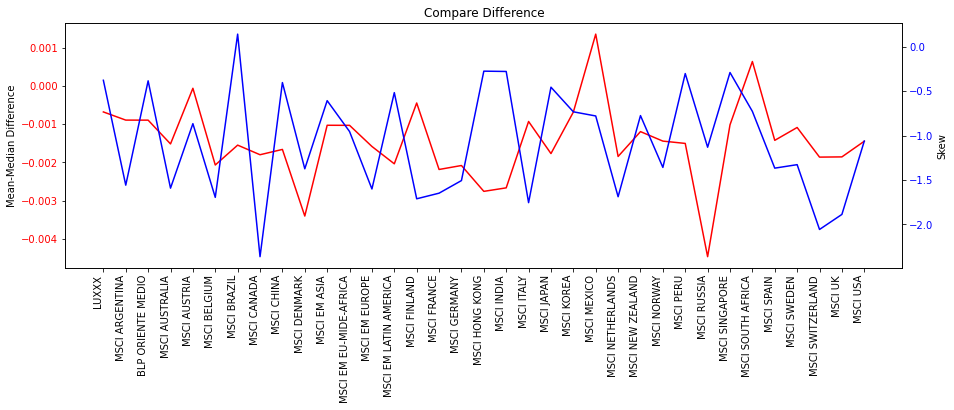

In [6]:
plot_twotime(diff, skew, title='Compare Difference', color1='r', color2='blue', 
             xlabel="Mean-Median Difference", ylabel="Skew")

In [7]:
skew.corr(diff)

0.12927861845766972

* We can see on the chart the difference between the Skewness and the mean-median, also the two positivly correlated, but the relationship is weak.

**Structural Breaks and Kurtosis**

Calculate the kurtosis for your response return series

In [8]:
df['MSCI USA'].pct_change().dropna().kurtosis()

10.488377562771928

Run a threshold regression model to identify at least 1 regime shift.

* We will use Markov switching dynamic regression model.

*(Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/markov_regression.html)*

In [9]:
regime_shift = MarkovRegression(df['MSCI USA'].pct_change().dropna(), k_regimes=2, trend="nc", switching_variance=True)
regime_shift_fit = regime_shift.fit()
regime_shift_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:               MSCI USA   No. Observations:                  251
Model:               MarkovRegression   Log Likelihood                 636.749
Date:                Tue, 18 Jan 2022   AIC                          -1265.498
Time:                        17:41:18   BIC                          -1251.397
Sample:                    01-08-2016   HQIC                         -1259.824
                         - 10-23-2020                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   2.34e-05      7.913      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0023      0.001      4.347      0.000       0.001       0.003
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9759      0.013     77.355      0.000       0.951       1.001
p[1->0]        0.0797      0.043      1.852      0.064      -0.005       0.164
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

* The first regime is a low-variance regime and the second regime is a high-variance regime.

* Plotting the Smoothed Marginal Probabilities:

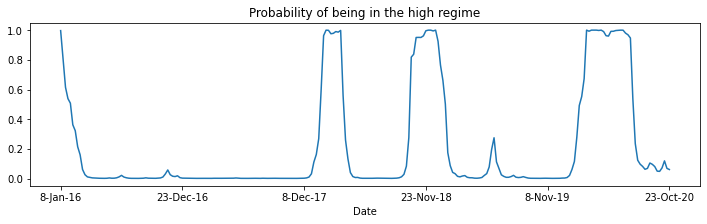

In [10]:
regime_shift_fit.smoothed_marginal_probabilities[1].plot(title="Probability of being in the high regime", 
                                                         figsize=(12, 3))

In [11]:
print(regime_shift_fit.expected_durations)

[41.51436567 12.54583048]


* From the summary output, the variance in the first regime which is the low-variance regime is 0.0002, the high-variance regime is 0.0023, on the above plot we can see that from 2016 till about the 8th of Dec 2017 it was a low return and low variance period, the expected duration of low-variance regime period is about 41 weeks or 9 and half months. 

* Also, on the plot we can see spikes end of 2017, 2018 and from end of 2019 till about mid 2020, these are high-variance regime periods, where the returns and volatility are high, these periods last about 12 weeks, or 3 months.

Calculate the standard deviation of the return series for each regime.

In [12]:
print("Std of Low regime:",regime_shift_fit.params[2])
print("Std of High regime:",regime_shift_fit.params[3])

Std of Low regime: 0.0001854340025719837
Std of High regime: 0.002267892392368318


In [13]:
regime_shift_fit.params[3]/regime_shift_fit.params[2]

12.230186270654132

* The Std during High regime periods are 12x higher then during Low regime periods.

Fit a Bivariate Normal Distribution BN(mean1, standard deviation1, mean2, standard deviation2, mixing parameter).  For simplicity, you can assume the means are the same.

* Here, we use the multivariate_normal function from scipy.stats, as we found this is an easier way run a BN Distribution, we just need to create two arrays, a Mean of the distribution and a Covariance matrix of the distribution.

* We take our response variable MSCI USA and MSCI CANADA.

In [14]:
mean = ((df[['MSCI USA', 'MSCI CANADA']]).pct_change().dropna()).mean()
cov = np.cov(df[['MSCI USA', 'MSCI CANADA']].T)
bn = stats.multivariate_normal(mean=mean, cov=cov, allow_singular=False)

**Visualizing Distributions**

Use your response variable that you ran a regime shift model.  Show the following graphs in side-by-side panels.  Keep the scales of the 2 graphs the same!

In [15]:
returns = df.pct_change().dropna()

* Plot histograms for each return series & Plot a qqplot for each return series. Superimpose the points on the plot

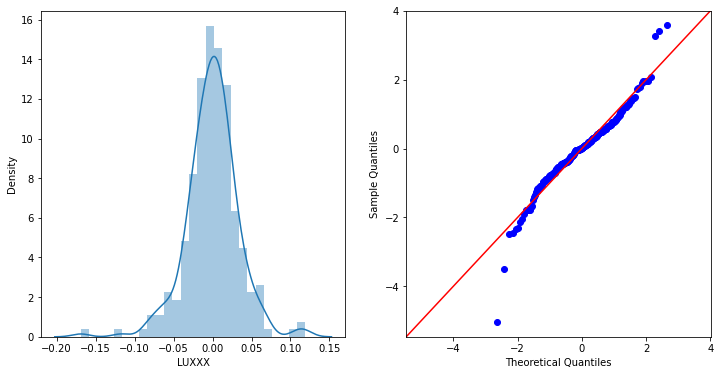

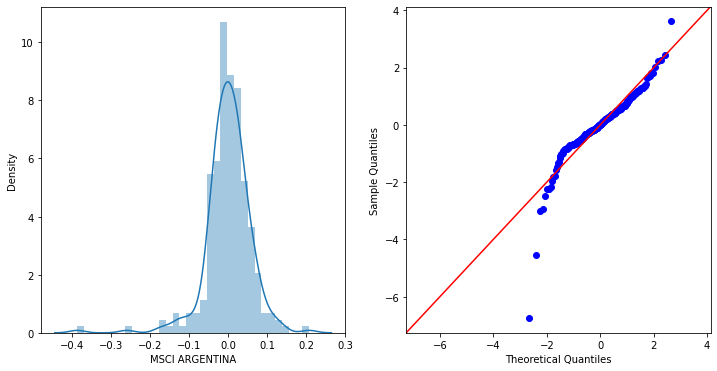

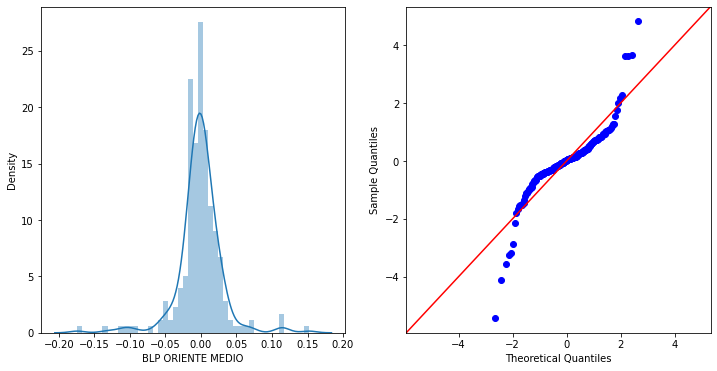

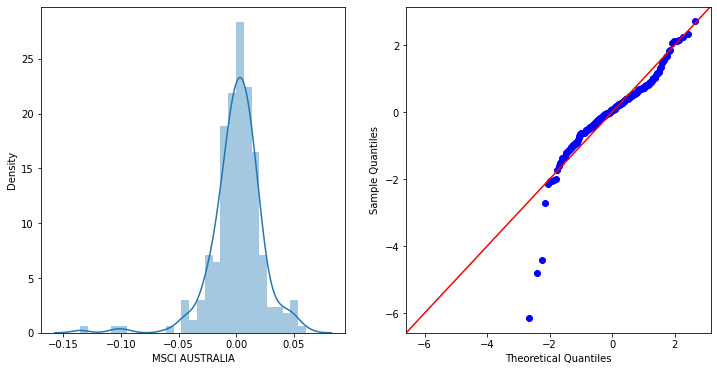

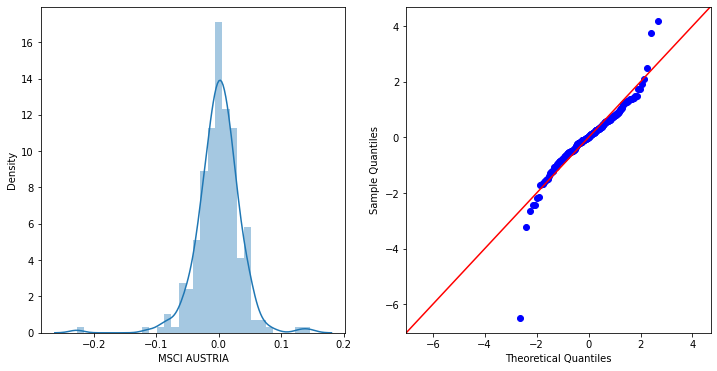

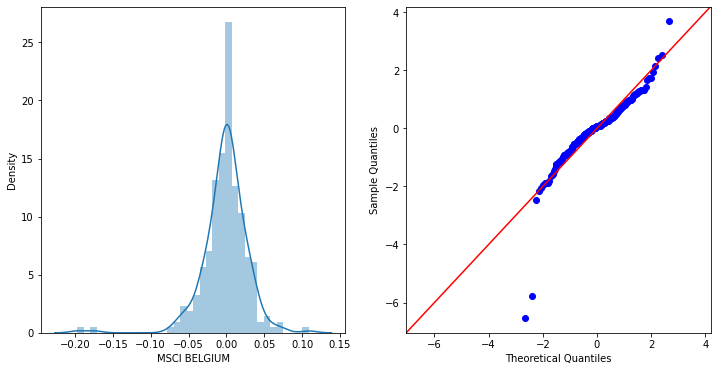

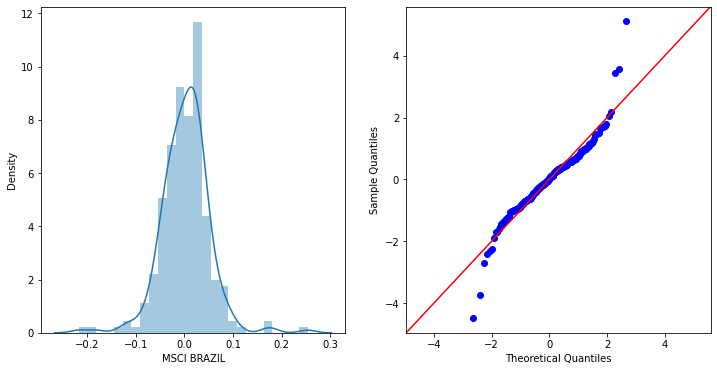

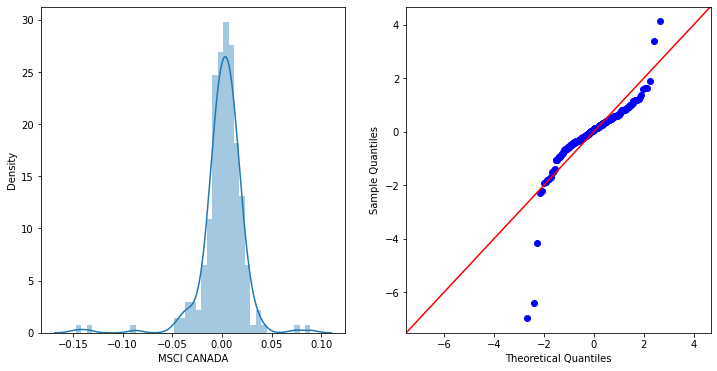

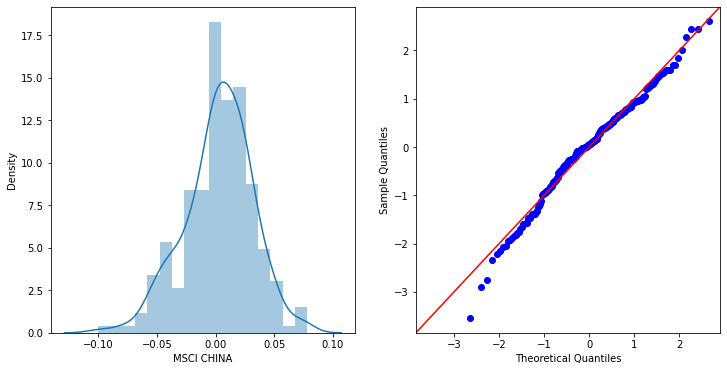

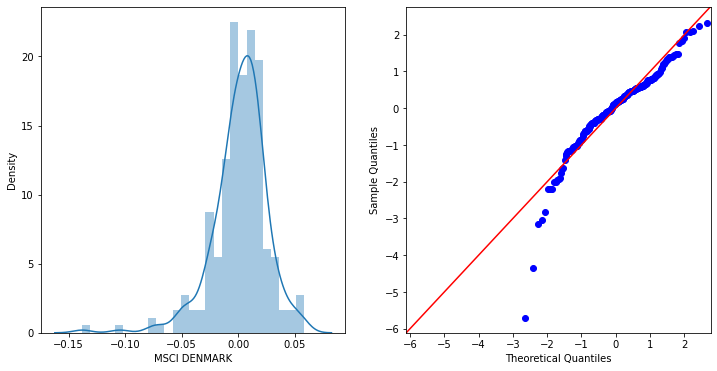

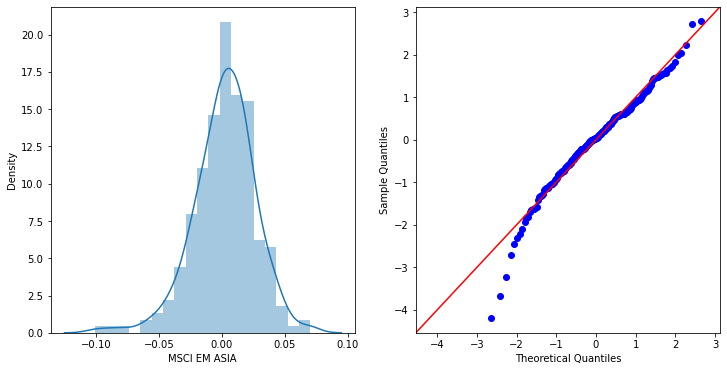

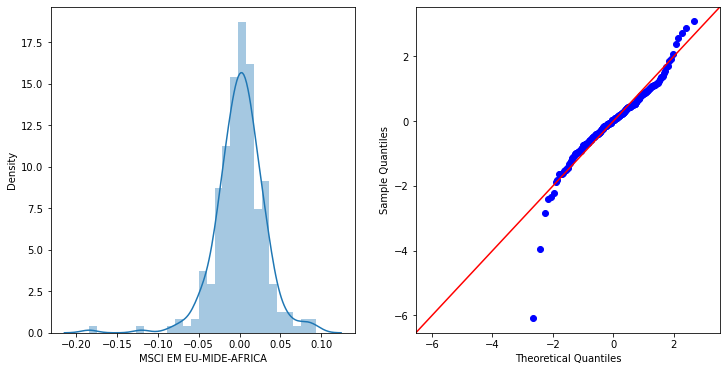

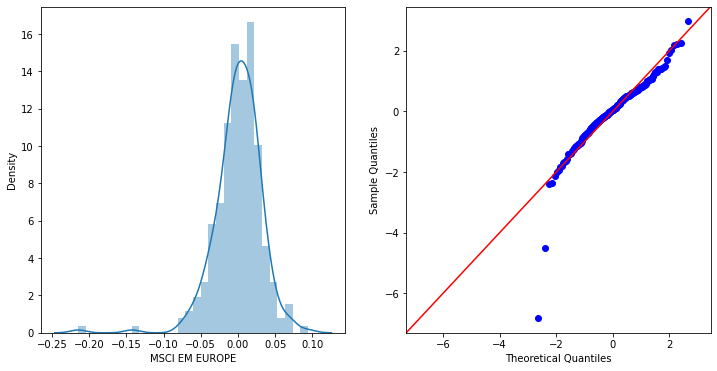

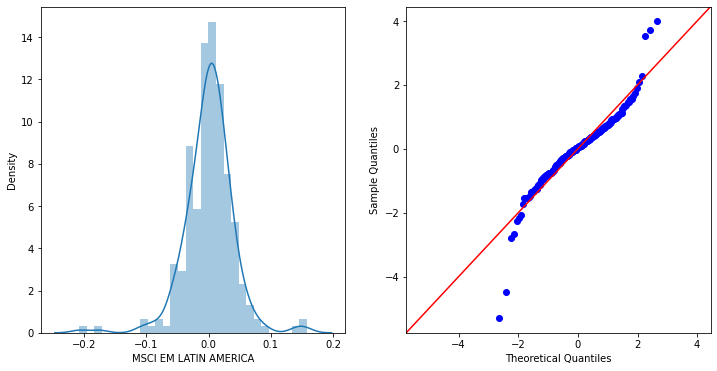

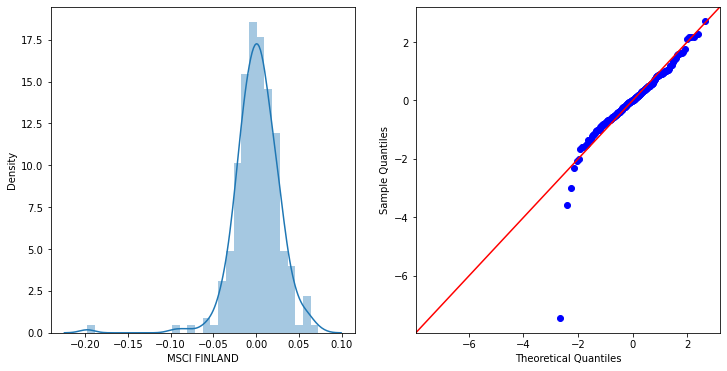

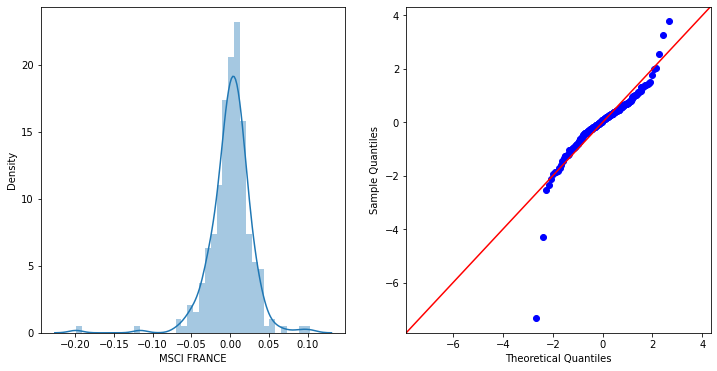

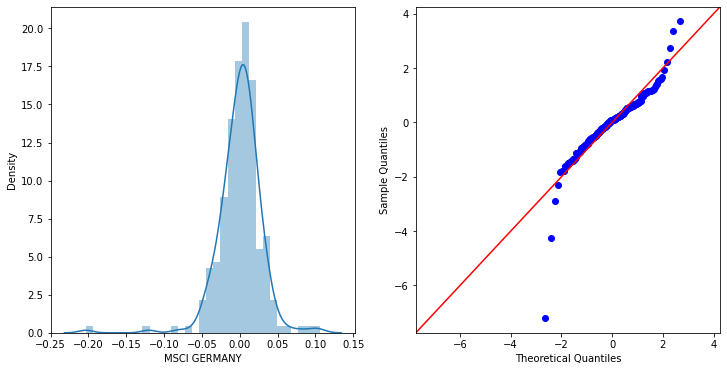

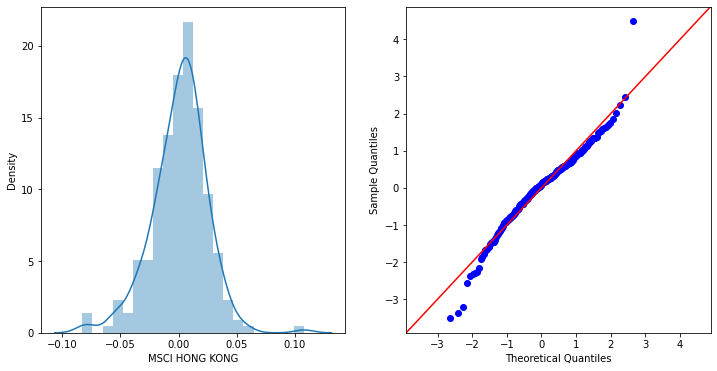

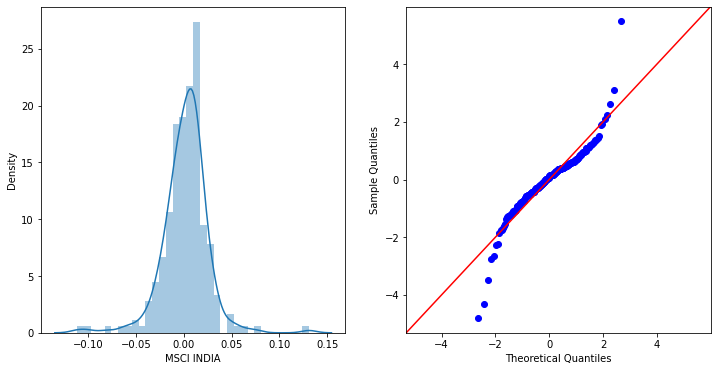

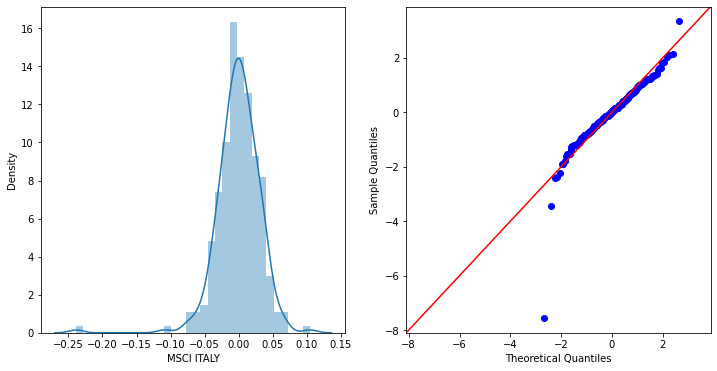

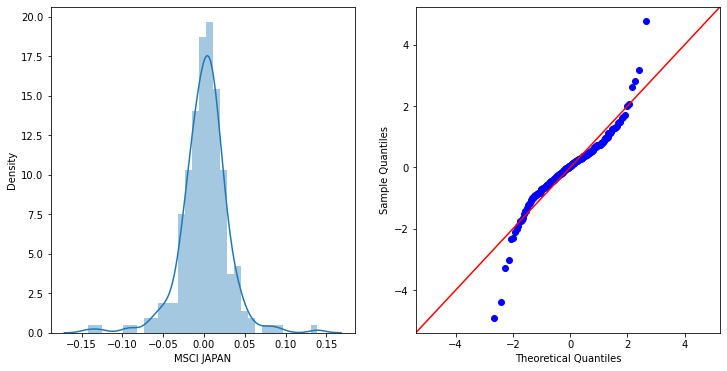

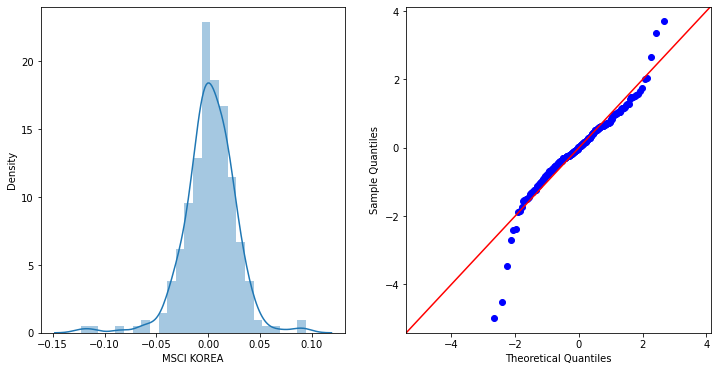

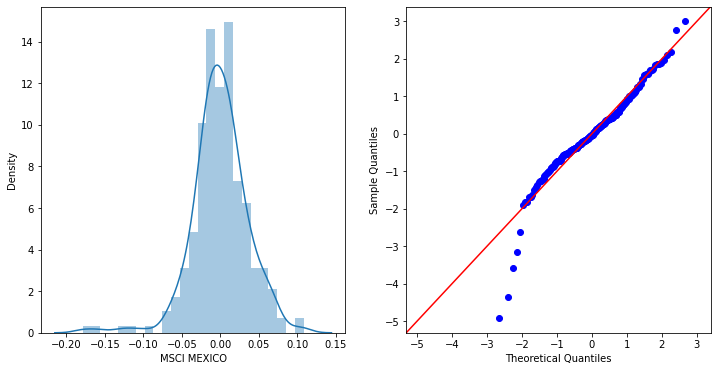

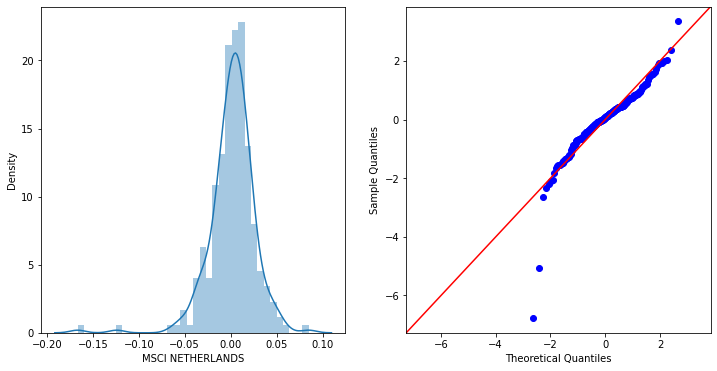

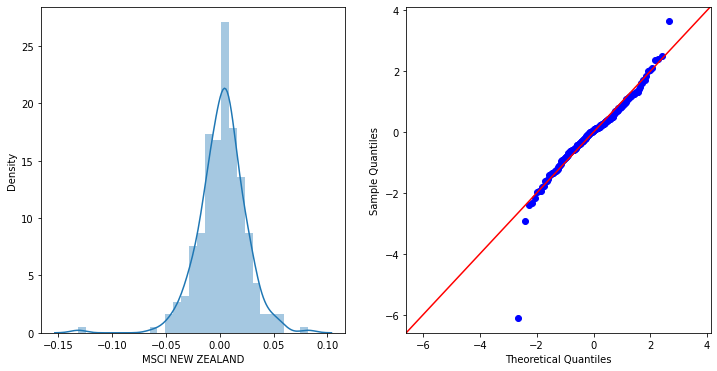

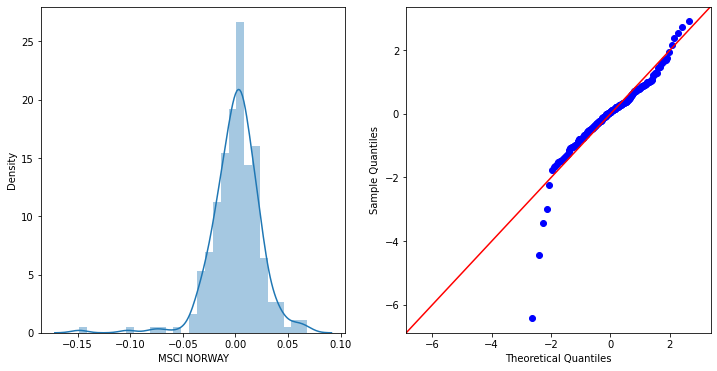

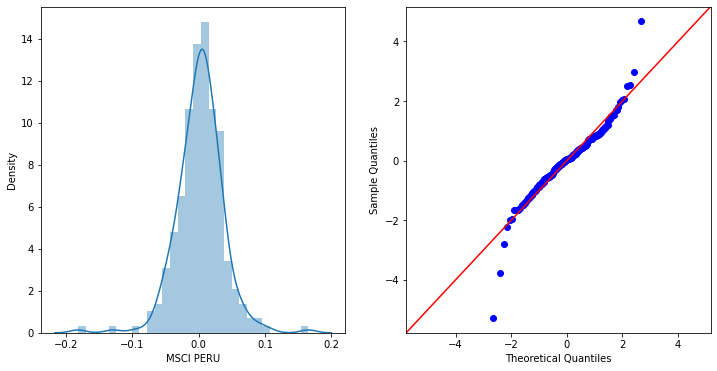

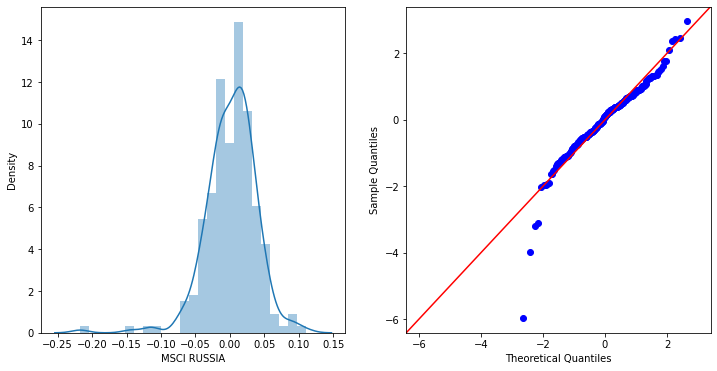

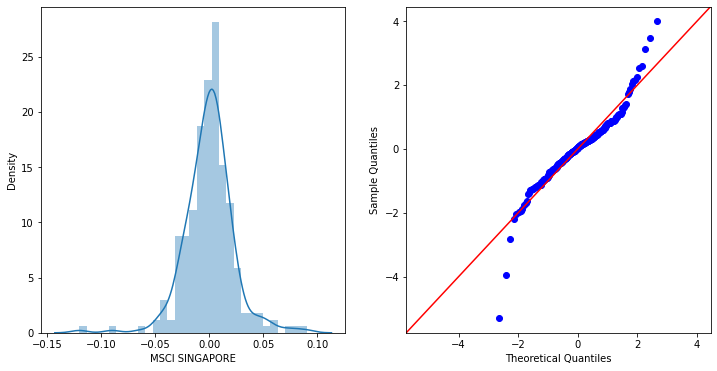

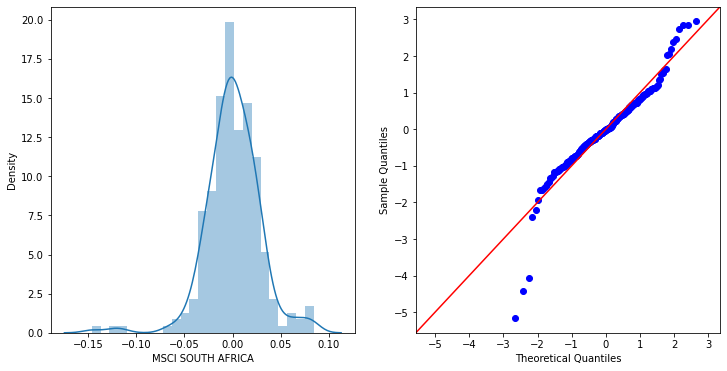

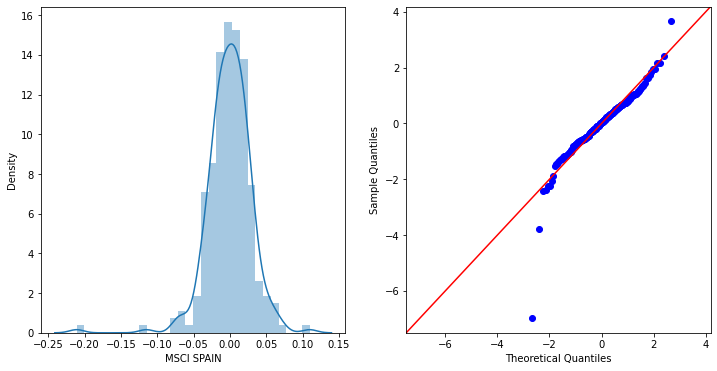

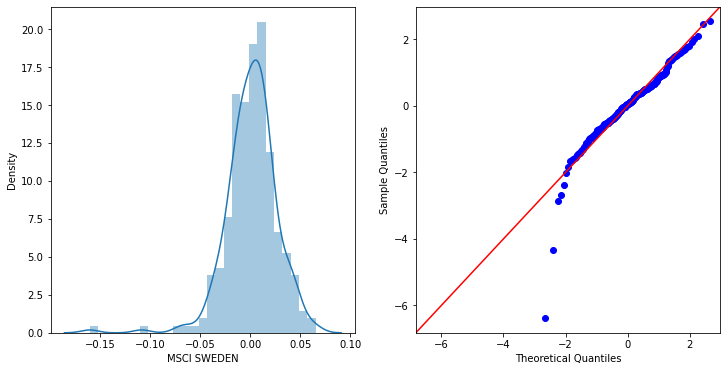

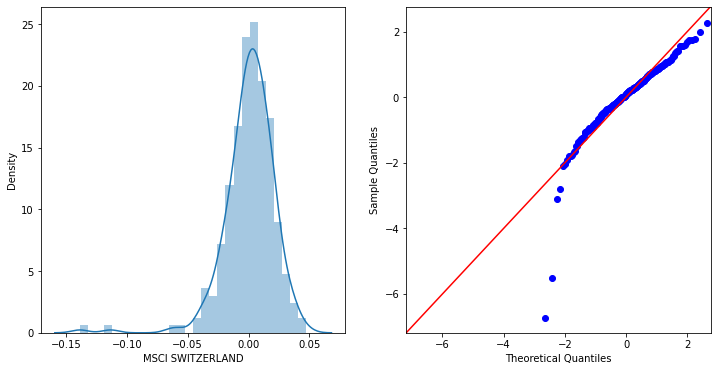

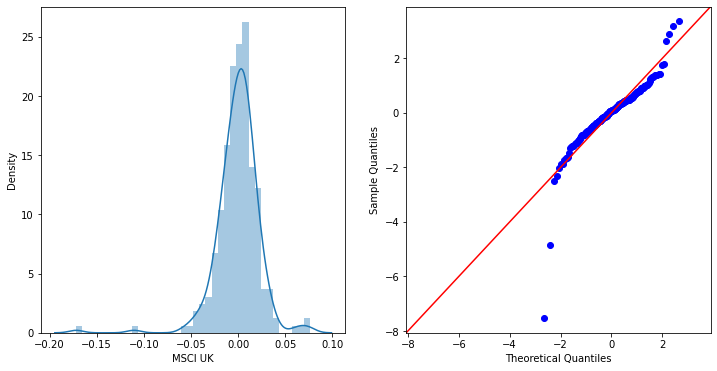

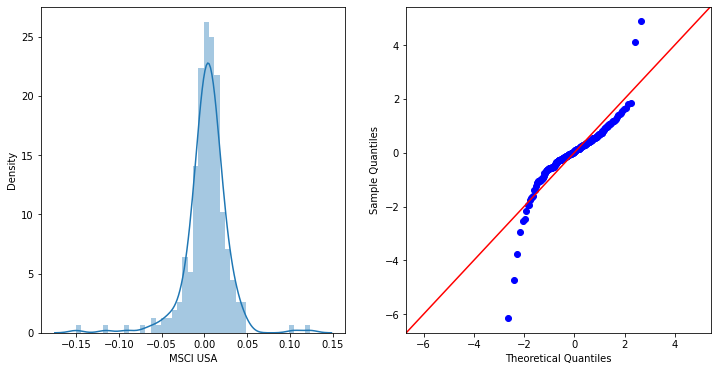

In [16]:
for i in returns:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=returns[i], ax=ax[0])
    sm.qqplot(returns[i], fit=True, line="45", ax=ax[1])
    fig.show()

**Outliers**

Using a combination of calculated stats and visuals, identify the outliers.

* We can see on the qqplots, that typically the first two and the last two elements are outliers.
* So, in order to identify them, we sort our series of returns and print out the first and last two elements of each series.

In [17]:
outliers_list = []

for i in returns:
    sorted_series = returns[i].sort_values()
    sorted_pd_ = (sorted_series[:2], sorted_series[-2:])
    outliers_list.append(sorted_pd_)

* The outliers of each Series:

In [18]:
outliers_list

[(Date
  13-Mar-20   -0.169119
  28-Feb-20   -0.117117
  Name: LUXXX, dtype: float64,
  Date
  7-Feb-20    0.113842
  5-Jun-20    0.119292
  Name: LUXXX, dtype: float64),
 (Date
  16-Aug-19   -0.387894
  20-Mar-20   -0.260543
  Name: MSCI ARGENTINA, dtype: float64,
  Date
  14-Jun-19    0.139627
  21-Sep-18    0.207826
  Name: MSCI ARGENTINA, dtype: float64),
 (Date
  13-Mar-20   -0.174116
  23-Aug-19   -0.132240
  Name: BLP ORIENTE MEDIO, dtype: float64,
  Date
  9-Aug-19     0.115005
  19-Jul-19    0.152038
  Name: BLP ORIENTE MEDIO, dtype: float64),
 (Date
  20-Mar-20   -0.135282
  13-Mar-20   -0.105290
  Name: MSCI AUSTRALIA, dtype: float64,
  Date
  9-Oct-20     0.052142
  10-Apr-20    0.060474
  Name: MSCI AUSTRALIA, dtype: float64),
 (Date
  13-Mar-20   -0.227208
  28-Feb-20   -0.112599
  Name: MSCI AUSTRIA, dtype: float64,
  Date
  10-Apr-20    0.130719
  5-Jun-20     0.145545
  Name: MSCI AUSTRIA, dtype: float64),
 (Date
  13-Mar-20   -0.196868
  28-Feb-20   -0.174104
  Name: 

What is a monotone transformation?

* Transforming one set of numbers into another set of numbers by preserving the order of the numbers.

Is there a monotone transformation of the data that can help handle the outliers better?  If so, perform it.

* Well, there is the PowerTransformer function from sklearn. We will run this here using the default ‘yeo-johnson’ method as this works with positive and negative values in order to find our whether or not it`s better to identify the outliers.

In [19]:
from sklearn.preprocessing import PowerTransformer

* Fitting the model:

In [20]:
pt = PowerTransformer()
pt.fit(df)
mono_transform = pt.transform(df)
mono_transform.sort(axis=1)

* Let`s plot the transformed data to identify outliers:

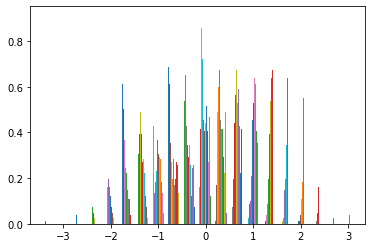

In [21]:
plt.hist(mono_transform, bins=20, density=True)
plt.show()

The monotone transformation might require less code to find out if we have outlires or not, but we think that the qqplot is better to identify and by putting these into a list we can see the actual number per date.

**Compare unsupervised and supervised methods of learning**

Is the neural network methodology supervised or unsupervised?  Explain.

* Actually neutral networks can be both supervised and unsupervised. 

* It`s supervised if the desired output is already known, such as pattern association or the stock return was higher or lower than the previous week.

* It`s unsupervised if we have no target outputs, such as given a set of text documents, NN can learn a mapping from documents to real-valued vector in such a way that resulting vectors are similar for documents with similar content using auto-encoders.

**Vector Auto-Regressive Moving Average (VARMA)**

Run an VARMA model, which models your response (e.g. LUXXX) versus lagged versions of itself AND with some number of exogeneous variables (e.g. the other ETFs). Use the variables you chose from your LASSO regression (see GWP#1).  

Variables from GWP 1:

            'MSCI FRANCE', 'MSCI EM EU-MIDE-AFRICA', 'MSCI FINLAND', 'MSCI ITALY', 'MSCI NEW ZEALAND', 
                                        'MSCI NETHERLANDS', 'MSCI SPAIN'

* Creating data frames:

In [22]:
other_etf = df[['MSCI USA', 'MSCI FRANCE', 'MSCI EM EU-MIDE-AFRICA', 'MSCI FINLAND', 'MSCI ITALY', 
                'MSCI NEW ZEALAND', 'MSCI NETHERLANDS', 'MSCI SPAIN']].pct_change().dropna()
response = pd.DataFrame(df['MSCI USA'][1:])

* Fitting the model:

In [23]:
varma_model = VARMAX(other_etf, exog=response, order=(1, 1), trend='c', 
                     enforce_stationarity=True, enforce_invertibility=True)
varma_model_result = varma_model.fit(disp=False)
varma_model_result.summary()

Dep. Variable:,"['MSCI USA', 'MSCI FRANCE', 'MSCI EM EU-MIDE-AFRICA', 'MSCI FINLAND', 'MSCI ITALY', 'MSCI NEW ZEALAND', 'MSCI NETHERLANDS', 'MSCI SPAIN']",No. Observations:,251
Model:,"VARMAX(1,1)",Log Likelihood,5540.249
,+ intercept,AIC,-10720.499
Date:,"Tue, 18 Jan 2022",BIC,-10085.917
Time:,17:42:12,HQIC,-10465.127
Sample:,01-08-2016,,
,- 10-23-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"24.99, 29.68, 46.31, 30.06, 32.81, 17.09, 27.09, 36.86",Jarque-Bera (JB):,"328.36, 638.69, 1.79, 21.56, 12.41, 2.47, 0.73, 3.12"
Prob(Q):,"0.97, 0.88, 0.23, 0.87, 0.78, 1.00, 0.94, 0.61",Prob(JB):,"0.00, 0.00, 0.41, 0.00, 0.00, 0.29, 0.69, 0.21"
Heteroskedasticity (H):,"2.77, 2.47, 0.65, 1.37, 0.46, 1.65, 1.55, 0.71",Skew:,"-1.04, -0.97, 0.05, 0.17, -0.24, -0.19, 0.12, -0.22"


What is the difference between how we ran LASSO (GWP #1) and the VARMA?  (Hint: think about time subscripts)

* LASSO performs feature selection by shrinking the redundant/not relevant features in a continous pattern towards zero.
* VARMA does linear forcasts by providng less parametized representation of the linear data generation processes.

Find a different set of variables that works BETTER than the original LASSO regression.  Show a statistical measure to justify its improved performance.

* First we tried to run the model using all the series in the data frame, but it turned out to be computationally expensive  and time consuming.

* So, we decided to find those series in the data set which are the most correlated with our MSCI USA response variable using the pearson correlation.


* We use those variables in our new VARMA model which has a correlation over 0.78.

In [24]:
coelated = df.corr(method='pearson')
coelated['MSCI USA'].sort_values(ascending=False) > 0.78

MSCI USA                   True
MSCI NETHERLANDS           True
MSCI SWITZERLAND           True
MSCI SWEDEN                True
MSCI INDIA                 True
MSCI NEW ZEALAND           True
MSCI CHINA                 True
MSCI EM ASIA               True
MSCI DENMARK              False
MSCI CANADA               False
MSCI RUSSIA               False
MSCI AUSTRALIA            False
MSCI FINLAND              False
MSCI FRANCE               False
MSCI NORWAY               False
MSCI JAPAN                False
MSCI KOREA                False
MSCI HONG KONG            False
MSCI PERU                 False
MSCI BRAZIL               False
MSCI EM EUROPE            False
MSCI ITALY                False
MSCI GERMANY              False
MSCI SINGAPORE            False
MSCI EM LATIN AMERICA     False
MSCI SOUTH AFRICA         False
MSCI AUSTRIA              False
MSCI EM EU-MIDE-AFRICA    False
MSCI UK                   False
MSCI SPAIN                False
MSCI ARGENTINA            False
LUXXX   

* The selected new variables are:

        MSCI NETHERLANDS, MSCI SWITZERLAND, MSCI SWEDEN, MSCI INDIA, MSCI NEW ZEALAND, MSCI CHINA, MSCI EM ASIA

* Creating data frame for the new set of variables:

In [25]:
other_etf_new = df[['MSCI USA','MSCI INDIA','MSCI SWEDEN','MSCI NETHERLANDS','MSCI SWITZERLAND','MSCI CHINA',
                    'MSCI NEW ZEALAND', 'MSCI EM ASIA' ]].pct_change().dropna()

* Fitting the new model:

In [26]:
varma_model_new = VARMAX(other_etf_new, exog=response, order=(1, 1), trend='c', 
                     enforce_stationarity=True, enforce_invertibility=True)
varma_model_result_new = varma_model_new.fit(disp=False)
varma_model_result_new.summary()

Dep. Variable:,"['MSCI USA', 'MSCI INDIA', 'MSCI SWEDEN', 'MSCI NETHERLANDS', 'MSCI SWITZERLAND', 'MSCI CHINA', 'MSCI NEW ZEALAND', 'MSCI EM ASIA']",No. Observations:,251
Model:,"VARMAX(1,1)",Log Likelihood,5650.725
,+ intercept,AIC,-10941.450
Date:,"Tue, 18 Jan 2022",BIC,-10306.868
Time:,17:42:34,HQIC,-10686.078
Sample:,01-08-2016,,
,- 10-23-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"27.92, 47.86, 36.26, 57.57, 41.84, 56.02, 20.95, 29.30",Jarque-Bera (JB):,"370.19, 103.79, 69.50, 1.46, 0.20, 4.38, 0.27, 2.31"
Prob(Q):,"0.93, 0.18, 0.64, 0.04, 0.39, 0.05, 0.99, 0.89",Prob(JB):,"0.00, 0.00, 0.00, 0.48, 0.90, 0.11, 0.87, 0.31"
Heteroskedasticity (H):,"3.62, 1.95, 1.69, 1.24, 1.31, 1.48, 1.57, 0.89",Skew:,"-0.92, -0.65, -0.28, -0.07, 0.05, -0.31, -0.08, 0.24"


* Evaluating the two VARMA models:

Based on the two model the second, varma_model_new fits better as the Log Likelihood is higher and AIC & BIC is lower compared to the first model using the variables from GWP 1.

In [27]:
print("Mean absolute errors:", varma_model_result.mae, "&", varma_model_result_new.mae)
print("Mean squared errors:",varma_model_result.mse, "&", varma_model_result_new.mse)

Mean absolute errors: 0.01846935751837774 & 0.016990278041689386
Mean squared errors: 0.005532681812520677 & 0.004490916122702039


Also as we can see Mean absolute error & Mean squared error are both lower for our second model with the new variables.

**Neural Networks**

Perform a Neural Network, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable number of layers, basing your result on cross-validation

* The response is categorical: Splitting the data into testing and training, with 2/3 for training and 1/3 for testing:

*Note: For the first try we did both Normalize & scale the data using MinMaxScaler & StandardScaler, but we got very low scores, we got much better results from the model using the original data.*

In [28]:
X_c, y_c = df.drop('MSCI USA',axis=1).pct_change().dropna(), df['MSCI USA'].pct_change().dropna()

* Assigning categorical values for the response variable:

In [29]:
y_c_booloean = []

for idx in range(0, len(y_c)):
    if y_c[idx] > 0:
        y_c_booloean.append("Positive") 
    else: 
        y_c_booloean.append("Negativ")

y_c_booloean = []
for idx in range(0, len(y_c)):
    if y_c[idx - 1] > y_c[idx]:
        y_c_booloean.append("Lower")
    else:
        y_c_booloean.append("Higher")

* Splitting the data into testing and training, with 2/3 for training and 1/3 for testing:

In [30]:
X_train_c,X_test_c,y_train_c,y_test_c=train_test_split(X_c,y_c_booloean,test_size=1/3,random_state=42)

* We will use Python's Scikit-Learn library to create our neural network that performs this classification task using the MLPClassifier.


* First, we run GridSearch to find the best parameters for a classifier.

*We did run tests for lbfgs & sgd solvers, but the adam optimizer worked the best, so we will not include lbfgs & sgd in the code below, otherwise it can take up to ours to run this GridSearchCV, depending on your PC. Also on large data sets the adam optimizer works better then lbfgs.*

In [31]:
parameters = {'solver': ['adam'], 'max_iter': [50,100,200,600], 'alpha': [0.1, 0.01, 0.001, 0.0001], 
              'hidden_layer_sizes':np.arange(25, 50, 5), 'random_state':[1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)

*(Running it might takes some time, please be patient)*

In [32]:
clf_grid.fit(X_c, y_c_booloean)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001],
                         'hidden_layer_sizes': array([25, 30, 35, 40, 45]),
                         'max_iter': [50, 100, 200, 600],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'solver': ['adam']})

In [33]:
print("The best score is:",clf_grid.best_score_)
print("The best parameters:",clf_grid.best_params_)

The best score is: 0.8046274509803922
The best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': 45, 'max_iter': 600, 'random_state': 7, 'solver': 'adam'}


* Fitting the model:

In [34]:
clf = neural_network.MLPClassifier(alpha=0.1,batch_size='auto', hidden_layer_sizes=(45), max_iter=600, 
                                   random_state=7, solver='adam')
clf.fit(X_train_c, y_train_c)

MLPClassifier(alpha=0.1, hidden_layer_sizes=45, max_iter=600, random_state=7)

* Predictions:

In [35]:
preds = clf.predict(X_test_c)

* Evalutating the model:

In [36]:
print(confusion_matrix(y_test_c, preds))
print(classification_report(y_test_c, preds))

[[21  9]
 [10 44]]
              precision    recall  f1-score   support

     Negativ       0.68      0.70      0.69        30
    Positive       0.83      0.81      0.82        54

    accuracy                           0.77        84
   macro avg       0.75      0.76      0.76        84
weighted avg       0.78      0.77      0.77        84



Run a Regression Neural Network.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable number of layers, basing your result on cross-validation

* The response is continuous: Splitting the data into testing and training, with 2/3 for training and 1/3 for testing:

In [37]:
X, y = df.drop('MSCI USA',axis=1), df['MSCI USA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

* We tried to use the GridSearchCV method to find the best parameters for our NN, however we were getting lousy results.


* So, tried to go through a number of layers by adding manually, and we found that 4 layers works the best with 34 neurons as we have 34 incoming features, based on the shape of the data, see below:

In [38]:
X_train.shape

(168, 34)

* Creating a Model:

In [39]:
model = Sequential()

model.add(Dense(34,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

* Training the Model:


To find the optimal number of epochs, we use the EarlyStopping function:

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [41]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
          verbose=0, batch_size=16, epochs=1000, callbacks=[early_stop])

Epoch 00258: early stopping


* Checking the model for overfitting:

Both the training loss and validation loss decreasing and stops at 657 epoch as the training does not imporve from there, as there are no huge spikes in the validation loss, seems there is no overfitting.

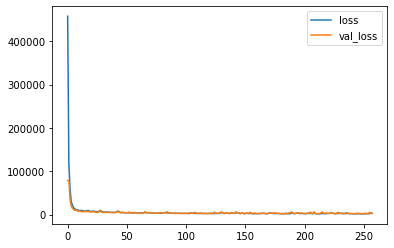

In [42]:
losses = pd.DataFrame(model.history.history)
losses.plot()

* Evaluation on Test Data:

In [43]:
predictions = model.predict(X_test)

In [44]:
print("Mean absolute error is", mean_absolute_error(y_test,predictions))
print("Mean squared error is", np.sqrt(mean_squared_error(y_test,predictions)))
print("The Variance explied by the models is", explained_variance_score(y_test,predictions))
print("Mean Absolute Percentage Error", mean_absolute_error(y_test,predictions)/df['MSCI USA'].mean()*100)

Mean absolute error is 36.40811093284971
Mean squared error is 49.34471953969419
The Variance explied by the models is 0.9820244004294539
Mean Absolute Percentage Error 1.441078671319222


* Plot Our predictions vs Perfect predictions

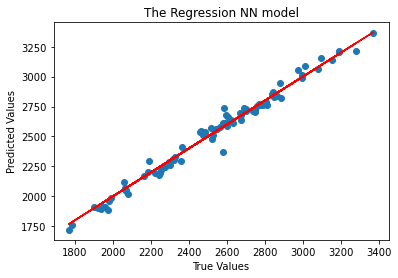

In [45]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('The Regression NN model')
plt.show()

Min & Max errors:

In [46]:
errors = y_test.values.reshape(84, 1) - predictions
print(min(errors), max(errors))

[-147.42660156] [208.71209961]


* Distribution of the errors:

Text(0.5, 1.0, 'Distribution of the Errors')

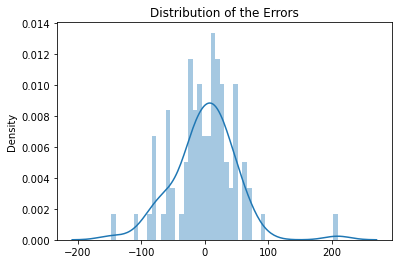

In [47]:
sns.distplot(errors, bins=50)
plt.title('Distribution of the Errors')

Which performed better, the classification or the regression network?

* It`s hard to compare the two as they use different metrics for evalutation.


* First of all, if we compare the NN classifcation model to our classifcation models from GWP 2, we can see that the NN classifcation model here performed better achiving 71% accuracy. Comparing NN regression to our LASSO regression from GWP 2, we can see the NN regression achived much better predictions with Mean absolute error 28, on average our predictions are about 1% off from the test data, which is on a weekly basis is very close. The Variance explied by the NN regression models is 99%, meanwhile the LASSO did about 96%. So, NN regression works better.


* Finally, If we have to compare the NN classification and regression, we like the NN the regression much better as we can see that how close our predictions are to the test data and how far we off, on average by 1%, on the Distribution plot we can see that most of the erros are within the -50 and 50 range, we think knowing this is much better then knowing whether the return was higher or lower than the previous week as the NN classifcation model it self cannot tell us by how much the return will be higher or lower.